## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Gerando Dados

In [2]:
# Configurando a seed para reprodutibilidade
np.random.seed(42)

# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

# Criando DataFrame
data = {
       'Data': np.random.choice(datas, num_registros),
       'Categoria': np.random.choice(categorias, num_registros),
       'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
       'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
   }
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

   # Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


## Consulta e Filtragem 

In [3]:
df = pd.read_csv('dados_vendas.csv')

##### Existem 365 linhas e cinco colunas no DF que foi carregado. 

In [4]:
df.shape

(365, 5)

##### Os dados são do tipo object, int e float.

In [5]:
df.dtypes

Data                   object
Categoria              object
Quantidade_Vendida      int64
Preco_Unitario        float64
Valor_Total           float64
dtype: object

##### Essas são as cinco primeiras linhas do DF.

In [6]:
df.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


##### As categorias são: roupas, alimentos, eletrônicos, brinquedos e livros. 

In [8]:
df['Categoria'].unique()

array(['Roupas', 'Alimentos', 'Eletrônicos', 'Brinquedos', 'Livros'],
      dtype=object)

##### Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos':

In [10]:
eletronicos = df[df['Categoria'] == 'Eletrônicos']
eletronicos

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
5,2023-07-08,Eletrônicos,73,256.12,18696.76
6,2023-01-21,Eletrônicos,1,274.53,274.53
7,2023-04-13,Eletrônicos,51,248.32,12664.32
14,2023-06-01,Eletrônicos,34,303.52,10319.68
18,2023-09-15,Eletrônicos,39,121.40,4734.60
...,...,...,...,...,...
347,2023-09-10,Eletrônicos,33,431.46,14238.18
349,2023-09-13,Eletrônicos,27,201.67,5445.09
351,2023-05-08,Eletrônicos,29,243.57,7063.53
353,2023-10-08,Eletrônicos,57,427.57,24371.49


##### Média do valor total das vendas na categoria 'Eletrônicos':
A média foi de 12.291,26.

In [12]:
eletronicos['Valor_Total'].mean()

np.float64(12291.256301369864)

##### Vendas acima de R$ 1000:

In [13]:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
vendas_acima_1000

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32
...,...,...,...,...,...
358,2023-12-26,Brinquedos,68,147.88,10055.84
359,2023-06-23,Alimentos,86,133.80,11506.80
361,2023-04-24,Brinquedos,10,350.90,3509.00
363,2023-12-08,Brinquedos,74,270.98,20052.52


##### Quantidade de ocorrências de vendas acima de R$ 1000:
Existiram 330 vendas acima desse valor. 

In [15]:
vendas_acima_1000.shape

(330, 5)

## Agrupamento e Agregação

##### Agrupar os dados por categoria e calcular o total de vendas por categoria:

A categoria "Alimentos" teve um total de R$ 742.457,74, sendo a categoria com o menor valor total de vendas. O total da categoria "Brinquedos" foi de 1.187.964,04, sendo a categoria com o maior valor total de vendas. As categorias "Eletrônicos", "Livros" e "Roupas" faturaram 897.261,71, 963.685,46 e 991.215,29, respectivamente. 

In [16]:
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
total_por_categoria

,Categoria,Valor_Total
0,Alimentos,742457.74
1,Brinquedos,1187964.04
2,Eletrônicos,897261.71
3,Livros,963685.46
4,Roupas,991215.29


##### Calcular a quantidade média vendida por categoria:
Embora a categoria "ALimentos" tenha apresentado um menor valor total de vendas, ela foi a categoria com maior quantidade média vendida (55,62). 

In [17]:
media_quantidade_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index()
media_quantidade_categoria

,Categoria,Quantidade_Vendida
0,Alimentos,55.618182
1,Brinquedos,47.247191
2,Eletrônicos,46.780822
3,Livros,50.917808
4,Roupas,47.200000


## Visualização dos Dados

##### Gráfico de barras mostrando o total de vendas por categoria:

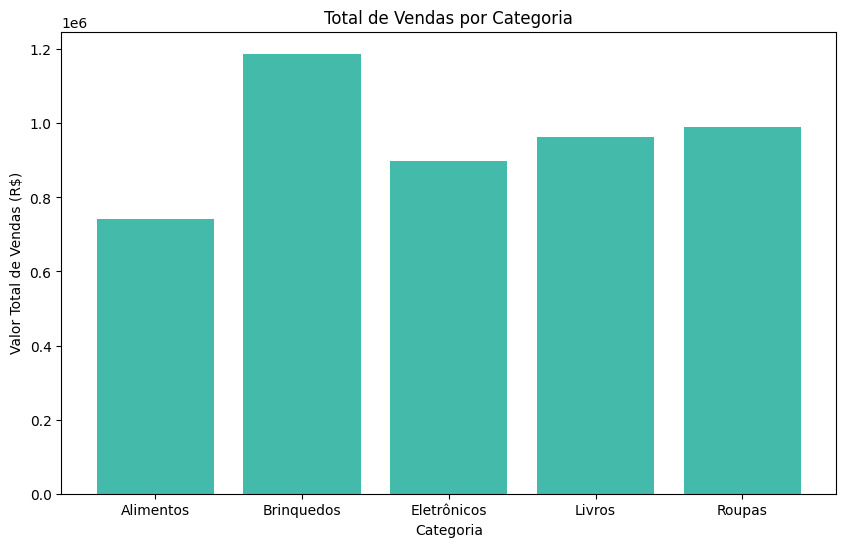

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='#4ba')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

Confirmando o que havia sido visto anteriormente, a categoria "Brinquedos" é quem mais se destaca em relação ao valor total de vendas. 

##### Gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos'

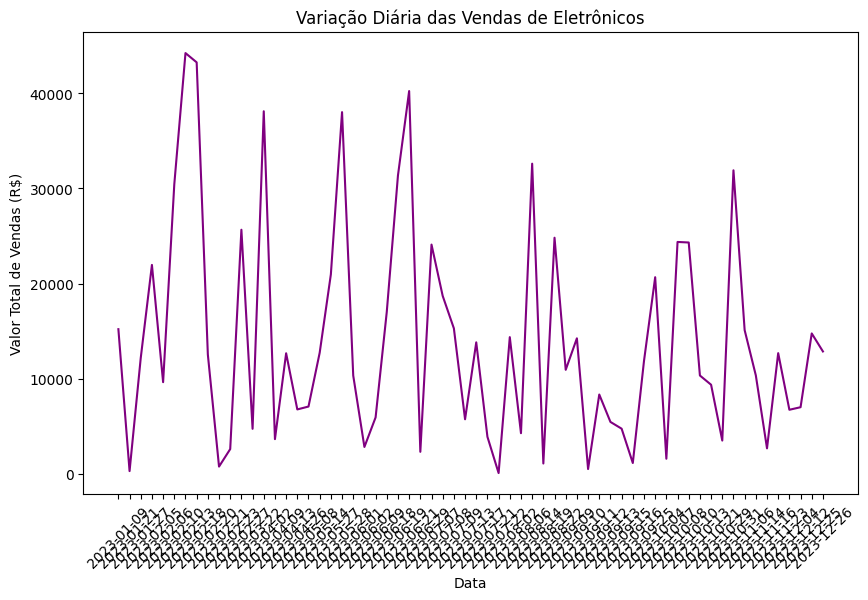

In [20]:
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

Nota-se que há uma alta volatilidade no valor das vendas de eletrônicos ao longo do tempo.